<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this hands-on, we are going to use a fun dataset to plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# convert the Name, Type1, and Type2 to Strings for future convenience
types = {
    "Name":"string",
    "Type 1":"string",
    "Type 2":"string"
}
pokemon = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv", dtype=types)
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,<NA>,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    string
 2   Type 1      800 non-null    string
 3   Type 2      414 non-null    string
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), string(3)
memory usage: 75.9 KB


Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `replot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell immediately following the plot to describe the relationship between Attack and Defense in this dataset.

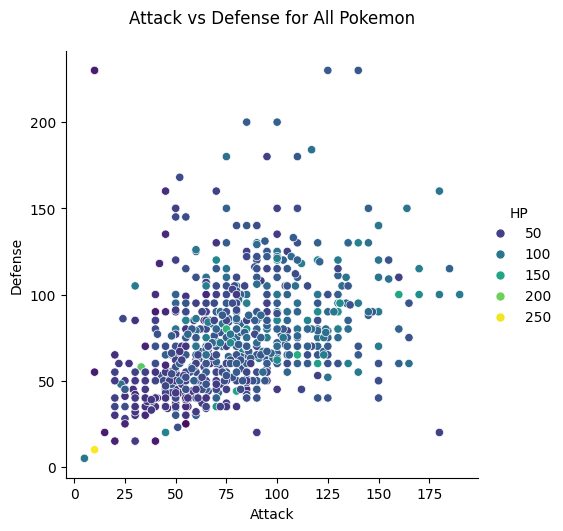

In [ ]:
# Attack, Defense, and HP do not have any NaN values; no need to dropna()
sns.relplot(
    data=pokemon,
    x="Attack",
    y="Defense",
    hue="HP",
    palette="viridis"
)
plt.title("Attack vs Defense for All Pokemon", pad=20);

From the plot, I observed that Attack and Defense for all pokemon have a positive correlation. As Attack increases, Defense also increases. In general, most of the pokemons have 50 and 100 HP, and 50 HP pokemons have lower defense and attack, while 100 HP pokemons have higher defense and higher attack. There is a single outlier pokemon who has 250 HP but very low defense and attack. However, the pokemon dataset includes duplicates of pokemons - the same pokemons who are at different levels of growth. Since pokemons might get stronger consistently in all aspects as they grow older, this could be the reason for the positive correlation. If we only include distinct pokemons, without any duplicates, then the positive correlation could lower.

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

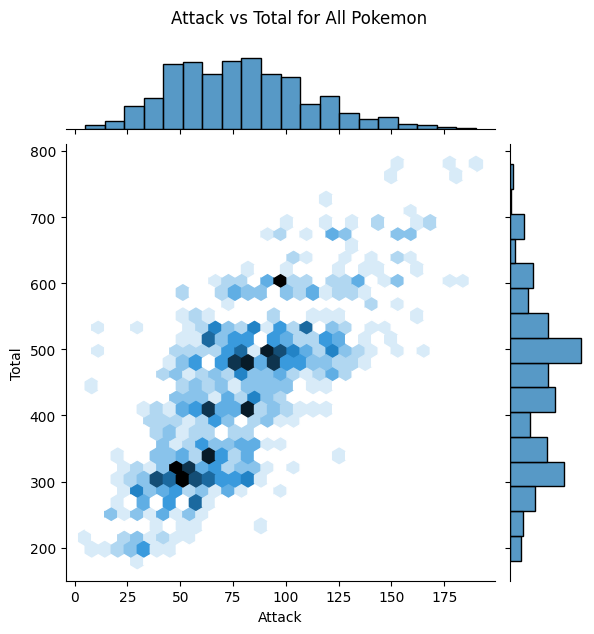

In [ ]:
g = sns.jointplot(
  data=pokemon,
  x="Attack",
  y="Total",
  kind="hex",
  gridsize=30
)
g.fig.suptitle("Attack vs Total for All Pokemon", y=1.05);


From the plot, I observed that Attack and Total have positive correlation. As Attack increases, Total also increases. This matches with the expectation as attack is a big part of how powerful a pokemon is. Besides this relation, the hexbin shows the distribution of the Total and Attack variables for all pokemons. From this, I can see that most Pokemons have an Attack from 50 to 110. I can also see that the Total attribute has a bimodal distribution, which could be because the lower normal distribution shows the pokemons at a low level, and the upper normal distribution shows the same pokemons at a higher level.

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

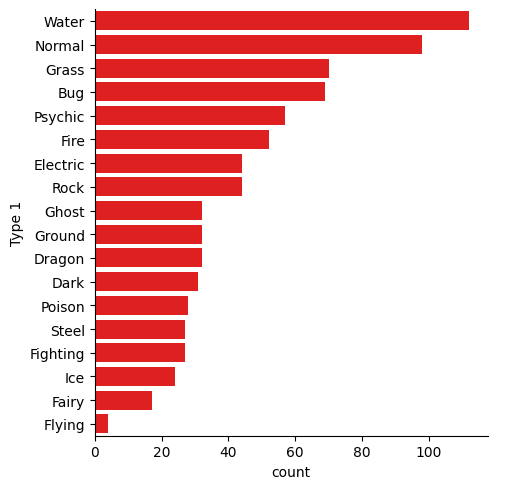

In [ ]:
sns.catplot(
    y="Type 1",
    data=pokemon,
    kind="count",
    color="red",
    order=pokemon["Type 1"].value_counts().index
)

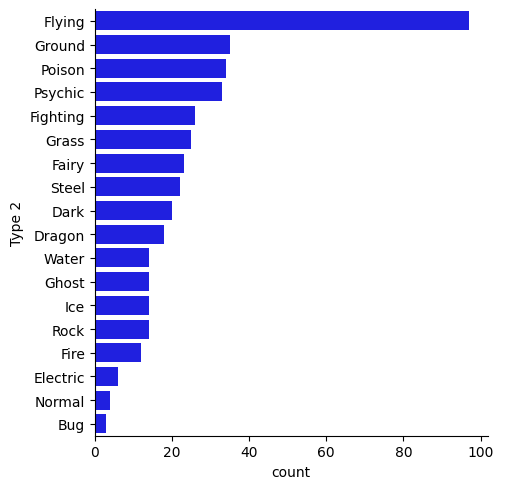

In [ ]:
# Although Type 2 has <NA>, the sns.catplot will automatically not include the <NA> in the plot,
# the value_counts() also does not include the <NA> index
sns.catplot(
    y="Type 2",
    data=pokemon,
    kind="count",
    color="blue",
    order=pokemon["Type 2"].value_counts().index
)

### Ans:
The most common values for Type 1 of pokemons are: Water, Normal, Grass, and Bug, while the most rare values are: Flying, Fairy, Ice, and Fighting.

In contrast, the most common values for Type 2, given that they have Type 2, of pokemons are: Flying, Ground, Poison, and Psychic, while the most rare values are: Bug, Normal, Electric, and Fire.